In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from classical_approach import *

## The Data

Just doing some quick investigation of the data. It appears that there are 79 galaxies/halos in total. The data to read in is a tuple: `(particle_info, halo_info)`.

The quantity we would like to predict is `GroupStellarMass`, I believe.

In [4]:
with open(halos_path, "rb") as f:
  particles, halo_slice  = pickle.load(f)

train_indices, test_indices = train_test_split(jnp.arange(len(particles)), test_size=0.5, random_state=42)

labels = jnp.log10(
    halo_slice["GroupStellarMass"] * 1e10 / 0.677
)  # label by logMstar
logc = jnp.log10(
    halo_slice["SubhaloVmax"]
    / jnp.sqrt(G * halo_slice["Group_M_Mean200"] / halo_slice["Group_R_Mean200"])
)
logm = jnp.log10(jnp.array([particle["count"] for particle in particles]))


train_labels, test_labels = labels[train_indices], labels[test_indices]
train_logc, test_logc = logc[train_indices], logc[test_indices]
train_logm, test_logm = logm[train_indices], logm[test_indices]

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [18]:
linear_regression = LinearRegression()

linear_regression.fit(jnp.stack([train_logc, train_logm], axis=-1), train_labels)

LinearRegression()

[Text(0.5, 0, 'logMstar'),
 Text(0, 0.5, 'Residuals'),
 Text(0.5, 1.0, 'Residuals vs logMstar')]

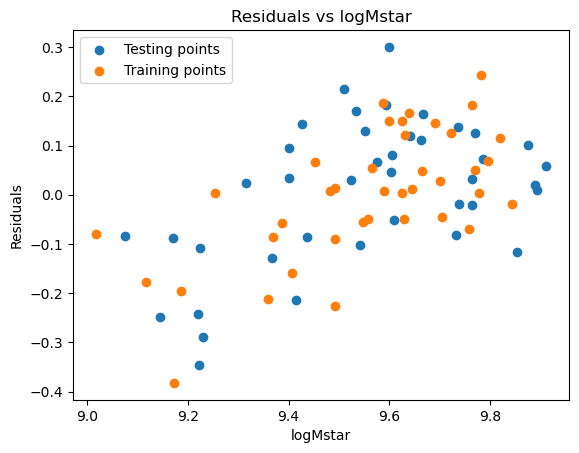

In [25]:
test_pred = linear_regression.predict(jnp.stack([test_logc, test_logm], axis=-1))
residuals = test_labels - test_pred

fig, ax = plt.subplots()

ax.scatter(test_labels, residuals, label="Testing points")
ax.scatter(train_labels, train_labels - linear_regression.predict(jnp.stack([train_logc, train_logm], axis=-1)), label="Training points")

ax.legend()

ax.set(xlabel="logMstar", ylabel="Residuals", title="Residuals vs logMstar")

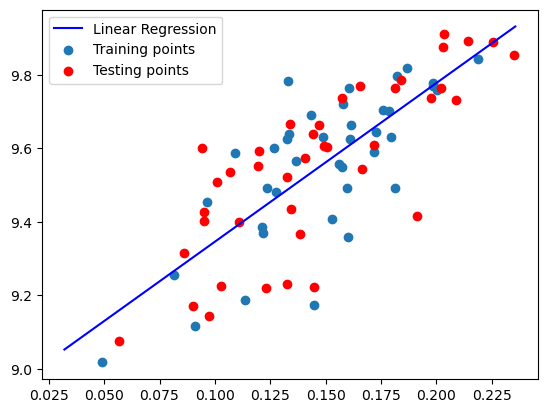

In [7]:
plt.plot(log_cs, preds, color="blue", label="Linear Regression")
plt.scatter(train_logc, train_labels, label="Training points")

plt.scatter(test_logc, test_labels, label="Testing points", color="red")

plt.legend()


In [6]:
example = particles[0]["Coordinates"]

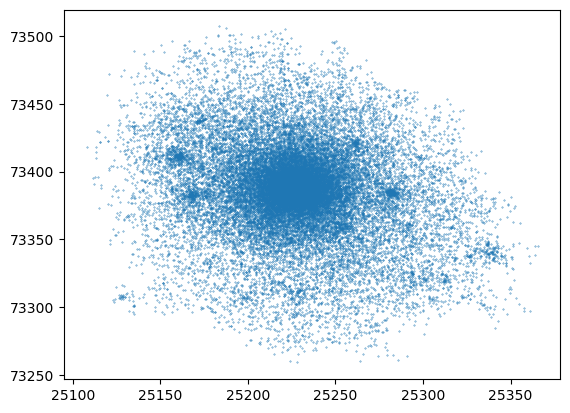

In [9]:
plt.scatter(example[:, 0], example[:, 1], s=0.1)